In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('5. Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Genre'])

In [9]:
df.drop(['Genre'], axis=1, inplace=True)
df.drop(['CustomerID'], axis=1, inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


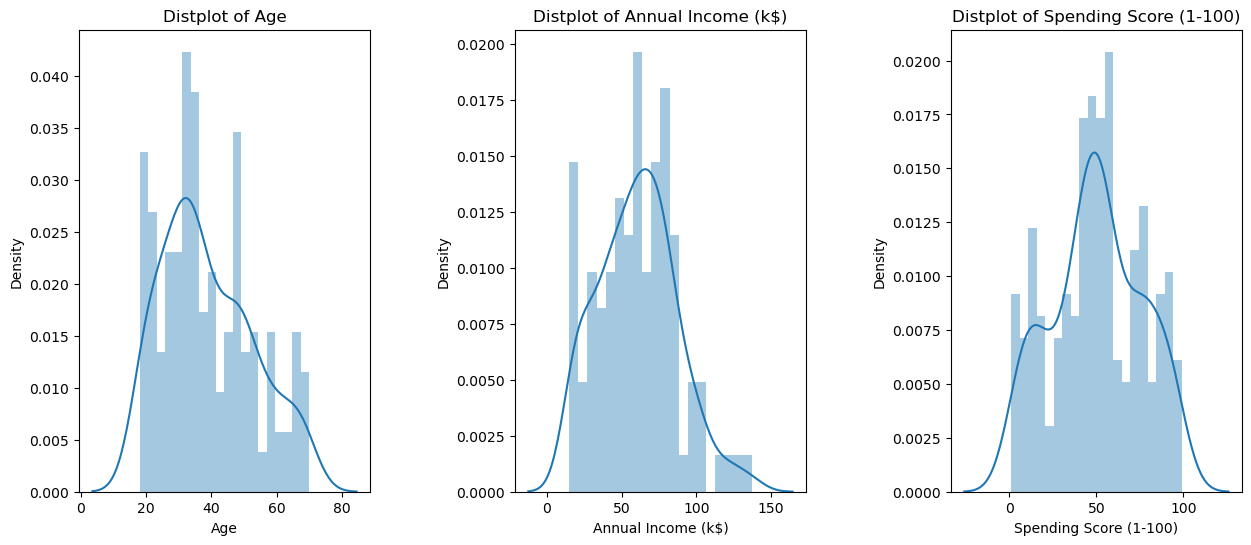

In [10]:
plt.figure(1, figsize=(15, 6))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

<Axes: xlabel='count', ylabel='Gender'>

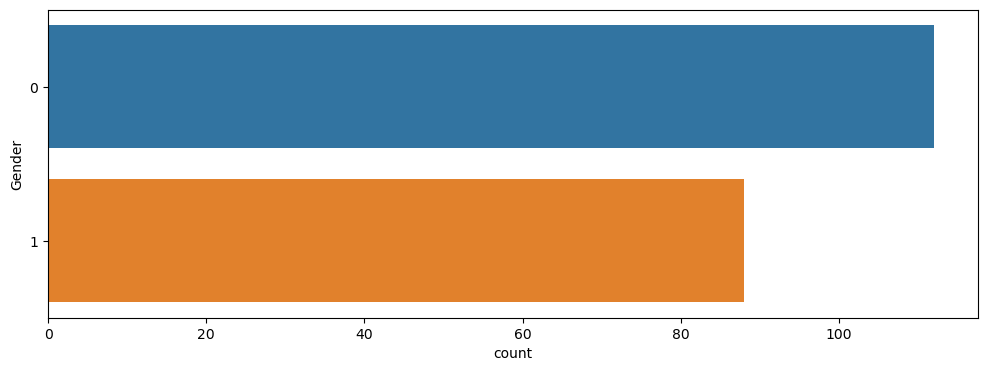

In [11]:
plt.figure(figsize=(12,4))
sns.countplot(y='Gender', data=df)

<Figure size 500x500 with 0 Axes>

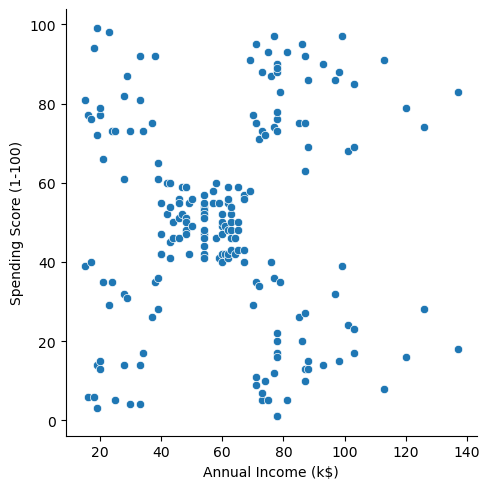

In [12]:
plt.figure(figsize=(5,5))
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df);

In [13]:
X = df.loc[:, ['Age', 'Spending Score (1-100)']].values

In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

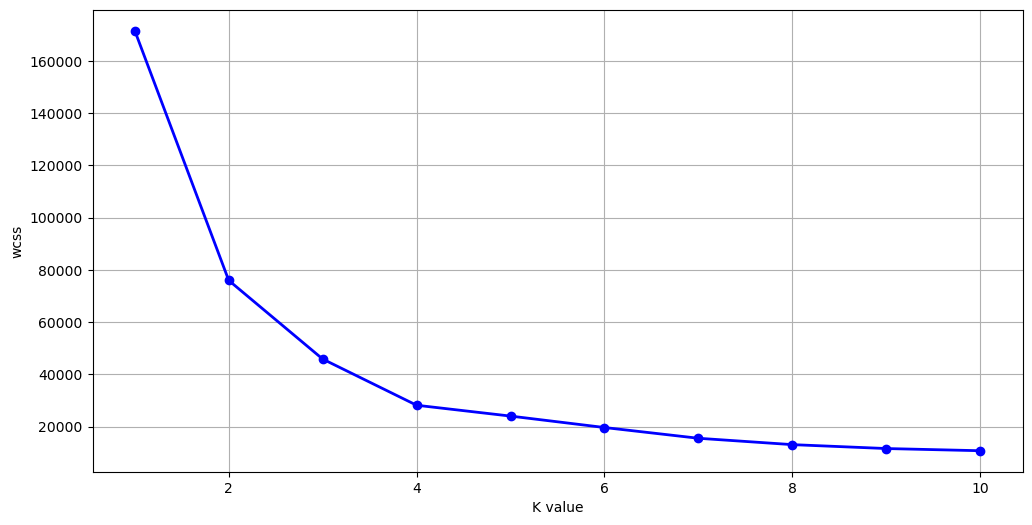

In [14]:
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='blue', marker='o')
plt.xlabel('K value')
plt.ylabel('wcss');

In [15]:
kmeans = KMeans(n_clusters=4)
kmeans.fit_predict(X)

array([0, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 0, 3, 1, 0, 1,
       3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 0,
       3, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [16]:
kmeans.cluster_centers_

array([[27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667],
       [43.29166667, 15.02083333]])

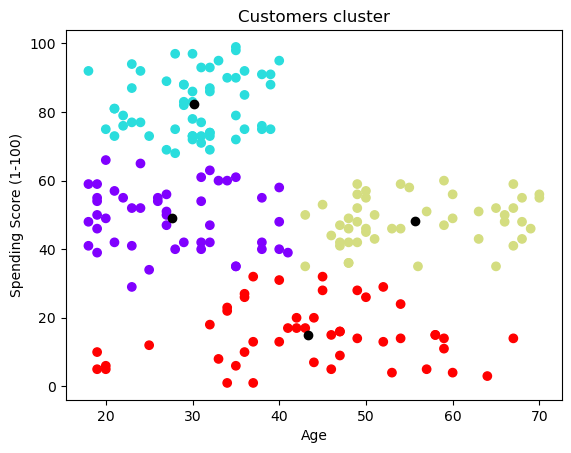

In [17]:
plt.scatter(X[:,0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Customers cluster')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)');

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
silhouette_score(X, kmeans.labels_)

0.49973941540141753

In [26]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1,10)]
silhouette_scores = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]]
silhouette_scores

[0.4692341232501655,
 0.45300127016521263,
 0.49973941540141753,
 0.44774691157513774,
 0.4044195972499981,
 0.3930185883365383,
 0.39806486273762287,
 0.37401505971961085]

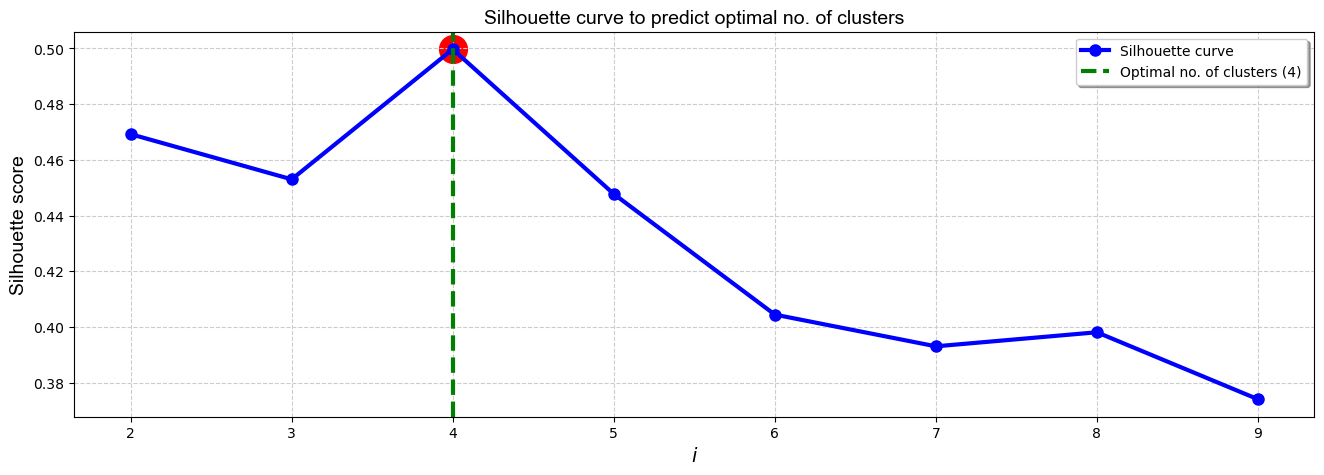

In [28]:
# Plot silhouette scores graph

from pylab import rcParams

rcParams['figure.figsize'] = 16,5
plt.plot(range(2,10), silhouette_scores, 'bo-', color='blue',
            linewidth=3, markersize=8, label='Silhouette curve')
plt.xlabel('$i$', fontsize=14, family='Arial')
plt.ylabel('Silhouette score', fontsize=14, family='Arial')
plt.grid(which='major', color='#cccccc', linestyle='--')

plt.title('Silhouette curve to predict optimal no. of clusters', fontsize=14, family='Arial')

# Calculate optimal no. of clusters
k = np.argmax(silhouette_scores) + 2

# Draw a vertical line to mark optinal no. of clusters
plt.axvline(x=k, linestyle='--', c='green', linewidth=3,
               label='Optimal no. of clusters ({})'.format(k))

plt.scatter(k, silhouette_scores[k-2], c='red', s=400)
plt.legend(shadow=True)
plt.show()

In [29]:
print('The optimal no. of clusters for the given data is {}'.format(k))

The optimal no. of clusters for the given data is 4
